# Covid-19 forecasting 

![https://ru.wikipedia.org/wiki/SARS-CoV-2](https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Coronavirus._SARS-CoV-2.png/275px-Coronavirus._SARS-CoV-2.png)
Источник: [Wikimedia.org](http://commons.wikimedia.org/)

## Введение. Постановка целей и задач.

COVID-19 — потенциально тяжёлая острая респираторная инфекция, вызываемая коронавирусом SARS-CoV-2 (2019-nCoV).
Представляет собой опасное заболевание, которое может протекать как в форме острой респираторной вирусной инфекции лёгкого течения, так и в тяжёлой форме.

Вспышка заболеваемости вирусом впервые была зафиксирована в Ухане, Китай, в декабре 2019 года. 30 января 2020 года Всемирная организация здравоохранения объявила эту вспышку чрезвычайной ситуацией в области общественного здравоохранения, имеющей международное значение, а 11 марта — пандемией.

Возможность предвидеть путь пандемии имеет решающее значение. Это важно для того, чтобы определить, как бороться, и отследить его распространение.

Наша цель - предсказать количество летальных исходов от короновирусной инфекции в отдельной стране в ближайшее время.  
Основная задача - попытаться выявить закономерности течения пандемии и построить модели предсказания.

## Импорт библиотек, ознакомление с данными.

### Импорт Датафрейма, библиотек, написание функций.

In [1]:
## импортируем библиотеки и функции
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set()
from pylab import rcParams
import datetime

import warnings
warnings.filterwarnings('ignore')

#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# метрики
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Задаем некоторые опции библиотеки pandas, которые 
# настраивают вывод
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 80)

In [2]:
## импортируем данные.
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [3]:
## проверка размера загруженных данных.
'Датафрейм содержит: {} строк и {} столбцов'.format(df.shape[0], df.shape[1])

'Датафрейм содержит: 165180 строк и 67 столбцов'

In [4]:
df.tail(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
165178,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,15624.193,0.000,23.200,357.338,0.000,0.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12941.0,2076414.0,137.582,0.857,4145.0,0.275,NaN,NaN,tests performed,7882244.0,4359872.0,3392578.0,129794.0,5302.0,8336.0,52.23,28.89,22.48,0.86,552.0,2780.0,0.018,50.0,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165179,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286,5395.0,2.0,1.286,15662.425,38.232,26.589,357.470,0.133,0.085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7890951.0,4362150.0,3396655.0,132146.0,8707.0,8836.0,52.29,28.90,22.51,0.88,585.0,2861.0,0.019,50.0,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


### Знакомство с данными.

Параметры полученного датафрейма

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165180 entries, 0 to 165179
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    165180 non-null  object 
 1   continent                                   155289 non-null  object 
 2   location                                    165180 non-null  object 
 3   date                                        165180 non-null  object 
 4   total_cases                                 162150 non-null  float64
 5   new_cases                                   162099 non-null  float64
 6   new_cases_smoothed                          160948 non-null  float64
 7   total_deaths                                144355 non-null  float64
 8   new_deaths                                  144509 non-null  float64
 9   new_deaths_smoothed                         144379 non-null  float64
 

Датафрейм содержит строковые и числовые данные, имеет расчетные поля, такие как количество зараженных, вылечившихся, вакцинированных на миллион или тысячу жителей, а также скользящее среднее показателей за 7 дней. 

По информации источника датасета данные взяты из репозитория данных COVID-19 Центра системных наук и инженерии (CSSE) Университета Джона Хопкинса (JHU), а также из официальных данных правительств стран. Набор данных о случаях и смертях обновляется ежедневно, о проведенном тестировании - раз в неделю. Количество случаев или смертей в определенный день не обязательно соответствует фактическому количеству на эту дату. Это связано с длинной цепочкой сообщений, которая существует между новым случаем/смертью и его включением в статистику.

Данные, предоставленные Россией за последние 30 дней

In [6]:
cm = sns.light_palette('green', as_cmap=True)

df[df.location == 'Russia'][-30:] \
    .style.background_gradient(cmap=cm) \
    .highlight_null('red')

#df[df.location == 'South Korea'][-30:].style.highlight_null(null_color='red')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
123633,RUS,Europe,Russia,2022-01-30,11547333.000000,120324.000000,89119.857000,324060.000000,608.000000,646.286000,79139.010000,824.634000,610.778000,2220.927000,4.167000,4.429000,1.680000,nan,nan,nan,nan,nan,nan,nan,nan,nan,255296660.000000,1749.662000,nan,657812.000000,4.508000,0.135500,7.400000,tests performed,154084022.000000,76555906.000000,69704859.000000,9957549.000000,421691.000000,307578.000000,105.600000,52.470000,47.770000,6.820000,2108.000000,119901.000000,0.082000,48.610000,145912022.000000,8.823000,39.600000,14.178000,9.393000,24765.954000,0.100000,431.297000,6.180000,23.400000,58.300000,nan,8.050000,72.580000,0.824000,nan,nan,nan,nan
123634,RUS,Europe,Russia,2022-01-31,11670366.000000,123033.000000,97477.000000,324672.000000,612.000000,642.000000,79982.210000,843.200000,668.053000,2225.122000,4.194000,4.400000,1.660000,nan,nan,nan,nan,nan,nan,nan,nan,866584.000000,256163244.000000,1755.601000,5.939000,749446.000000,5.136000,0.130100,7.700000,tests performed,154374065.000000,76585311.000000,69815128.000000,10107949.000000,290043.000000,272504.000000,105.800000,52.490000,47.850000,6.930000,1868.000000,105371.000000,0.072000,48.610000,145912022.000000,8.823000,39.600000,14.178000,9.393000,24765.954000,0.100000,431.297000,6.180000,23.400000,58.300000,nan,8.050000,72.580000,0.824000,nan,nan,nan,nan
123635,RUS,Europe,Russia,2022-02-01,11795059.000000,124693.000000,105687.571000,325321.000000,649.000000,639.571000,80836.787000,854.577000,724.324000,2229.570000,4.448000,4.383000,1.630000,nan,nan,nan,nan,nan,nan,nan,nan,738798.000000,256902042.000000,1760.664000,5.063000,822826.000000,5.639000,0.128400,7.800000,tests performed,154723714.000000,76663085.000000,69967776.000000,10227342.000000,349649.000000,317496.000000,106.040000,52.540000,47.950000,7.010000,2176.000000,112818.000000,0.077000,48.610000,145912022.000000,8.823000,39.600000,14.178000,9.393000,24765.954000,0.100000,431.297000,6.180000,23.400000,58.300000,nan,8.050000,72.580000,0.824000,nan,nan,nan,nan
123636,RUS,Europe,Russia,2022-02-02,11936064.000000,141005.000000,115249.429000,325986.000000,665.000000,643.143000,81803.157000,966.370000,789.856000,2234.127000,4.558000,4.408000,1.600000,nan,nan,nan,nan,nan,nan,nan,nan,738376.000000,257640418.000000,1765.724000,5.060000,850688.000000,5.830000,0.135500,7.400000,tests performed,154892987.000000,76732949.000000,70013431.000000,10281173.000000,169273.000000,282301.000000,106.160000,52.590000,47.980000,7.050000,1935.000000,101247.000000,0.069000,48.610000,145912022.000000,8.823000,39.600000,14.178000,9.393000,24765.954000,0.100000,431.2970

Датафрейм содержит 67 полей, наиболее значимые из них:
 - **location** - географическое положение (страна)
 - **date** - дата наблюдения
 - **total_cases** - общее количество случаев заражения COVID-19
 - **new_cases** - количество новых случаев заражения
 - **total_deaths** - общее количество умерших от COVID-19
 - **new_deaths** - количество новых умерших
 - **icu_patients** - количество пациентов с COVID-19 в отделениях интенсивной терапии в данный день
 - **hosp_patients** - количество пациентов с COVID-19 в больнице в данный день
 - **stringency_index** - степень введенных ограничений
 - **reproduction_rate** - оценка скорости распространения заражения
 - **new_vaccinations** - новые вакцинирования
 - **people_vaccinated** - количество людей, получивших хотя бы одну дозу вакцины
 - **people_fully_vaccinated** - полностью вакцинированные 

 Также есть данные статистики о численности населения, плотности расселения, среднем возрасте, доле человек возрастом старше 65 и 70 лет, процент курящих мужчин и женщин.

## Предобработка данных

### Фильтрация данных

Список всех стран и регионов, присутствующих в датасете

In [7]:
list(df.location.unique())

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


Для проведения анализа выбрана Германия.

In [8]:
df1 = df[df.location == 'Denmark']
df1.tail(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
41023,DNK,Europe,Denmark,2022-02-26,2731806.0,17359.0,25635.000,4538.0,37.0,37.143,469923.290,2986.083,4409.714,780.623,6.365,6.389,0.74,45.0,7.741,1572.0,270.414,NaN,NaN,2625.0,451.551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13170739.0,4844629.0,4742254.0,3630906.0,1138.0,1798.0,226.56,83.34,81.58,62.46,309.0,88.0,0.002,16.67,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
41024,DNK,Europe,Denmark,2022-02-27,2748260.0,16454.0,24315.571,4584.0,46.0,38.857,472753.695,2830.405,4182.747,788.536,7.913,6.684,NaN,48.0,8.257,1643.0,282.628,NaN,NaN,2527.0,434.693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13171712.0,4844688.0,4742470.0,3631601.0,973.0,1790.0,226.58,83.34,81.58,62.47,308.0,90.0,0.002,16.67,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
41025,DNK,Europe,Denmark,2022-02-28,2764838.0,16578.0,22557.714,4612.0,28.0,38.714,475605.430,2851.736,3880.362,793.353,4.817,6.660,NaN,42.0,7.225,1751.0,301.206,NaN,NaN,2347.0,403.729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.67,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN


In [9]:
df1 = df1[['date','new_cases','hosp_patients','icu_patients','new_deaths','stringency_index']]
df1.rename(columns={'new_cases':'заражение', 
                    'hosp_patients':'госпиталь',
                    'icu_patients':'ивл', 
                    'new_deaths':'летально',
                    'stringency_index':'ограничение'}, inplace=True)
df1.head()

,date,заражение,госпиталь,ивл,летально,ограничение
40268,2020-02-02,NaN,NaN,NaN,NaN,0.0
40269,2020-02-03,NaN,NaN,NaN,NaN,0.0
40270,2020-02-04,NaN,NaN,NaN,NaN,0.0
40271,2020-02-05,NaN,NaN,NaN,NaN,0.0
40272,2020-02-06,NaN,NaN,NaN,NaN,0.0


### Обработка пропусков

Определение временных границ датафрейма

In [10]:
start_date = df1.date.min()
end_date = df1.date.max()
print('Период представленных данных с {} по {}'.format(start_date, end_date))

Период представленных данных с 2020-02-02 по 2022-02-28


Определение количества пропущенных дней

In [11]:
date_range = pd.date_range(start=df1.date.min(), end=df1.date.max(), freq='D')
print('Пропущено дней в индексе: ', len(date_range[~date_range.isin(df1.date)]))

Пропущено дней в индексе:  0


Проверка пропусков в данных

In [12]:
df1.isna().sum()

date            0
заражение      25
госпиталь      60
ивл            22
летально       42
ограничение     0
dtype: int64

Визуальная оценка отсутствующих данных

In [13]:
df1.style.background_gradient(cmap=cm) \
    .highlight_null('red')

,date,заражение,госпиталь,ивл,летально,ограничение
40268,2020-02-02,nan,nan,nan,nan,0.000000
40269,2020-02-03,nan,nan,nan,nan,0.000000
40270,2020-02-04,nan,nan,nan,nan,0.000000
40271,2020-02-05,nan,nan,nan,nan,0.000000
40272,2020-02-06,nan,nan,nan,nan,0.000000
40273,2020-02-07,nan,nan,nan,nan,0.000000
40274,2020-02-08,nan,nan,nan,nan,0.000000
40275,2020-02-09,nan,nan,nan,nan,0.000000
40276,2020-02-10,nan,nan,nan,nan,0.000000
40277,2020-02-11,nan,nan,nan,nan,0.000000


Устранение пропущенных значений, в начале датафрейма нулями, в конце и середине - предыдущими значениями

In [14]:
df1['заражение'].fillna(0, inplace=True)
df1['госпиталь'].fillna(method='ffill', inplace=True)
df1['ивл'].fillna(method='ffill', inplace=True)
df1['летально'].fillna(method='ffill', inplace=True)
df1['госпиталь'].fillna(0, inplace=True)
df1['ивл'].fillna(0, inplace=True)
df1['летально'].fillna(0, inplace=True)
df1['ограничение'].fillna(0, inplace=True)
df1.isna().sum()

date           0
заражение      0
госпиталь      0
ивл            0
летально       0
ограничение    0
dtype: int64

Приведение количественных показателей к целым числам

In [15]:
columns = ['заражение','госпиталь','ивл','летально']
for col in columns:
    df1[col] = df1[col].astype(int)
df1.tail()

,date,заражение,госпиталь,ивл,летально,ограничение
41021,2022-02-24,25209,1746,37,39,16.67
41022,2022-02-25,22784,1762,45,40,16.67
41023,2022-02-26,17359,1572,45,37,16.67
41024,2022-02-27,16454,1643,48,46,16.67
41025,2022-02-28,16578,1751,42,28,16.67


### Вывод по этапу.


Данные по выбранной стране подготовлены для дальнейшего анализа. Проведена работа с отсутствующими данными.

## EDA или разведочный анализ данных.

Приведение значений колонки 'дата' в формат datetime и назначение индекса датафрейма

In [16]:
df1['date'] = pd.to_datetime(df1.date)
df1.set_index('date', inplace=True)

Озор статистики значений признаков

In [17]:
df1.describe()

,заражение,госпиталь,ивл,летально,ограничение
count,758.000000,758.000000,758.000000,758.000000,758.000000
mean,3647.543536,270.583113,36.767810,6.015831,47.603628
std,9599.300773,332.248897,33.830316,9.014725,17.483983
min,-2001.000000,0.000000,0.000000,-6.000000,0.000000
25%,153.500000,58.250000,13.000000,0.000000,38.890000
50%,591.000000,146.500000,30.000000,2.000000,50.930000
75%,1235.000000,334.750000,46.000000,8.000000,62.040000
max,55120.000000,1762.000000,153.000000,60.000000,72.220000


В колонках присутствуют отрицательные значения. Это возможно из-за корректировки правительством завышенных ранее данных. Необходимо установить эти значения в 0.

In [18]:
df1['заражение'][df1['заражение'] < 0] = 0
df1['летально'][df1['летально'] < 0] = 0
df1.describe()

,заражение,госпиталь,ивл,летально,ограничение
count,758.000000,758.000000,758.000000,758.000000,758.000000
mean,3650.183377,270.583113,36.767810,6.023747,47.603628
std,9598.020408,332.248897,33.830316,9.006791,17.483983
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153.500000,58.250000,13.000000,0.000000,38.890000
50%,591.000000,146.500000,30.000000,2.000000,50.930000
75%,1235.000000,334.750000,46.000000,8.000000,62.040000
max,55120.000000,1762.000000,153.000000,60.000000,72.220000


Визуальное представление данных.

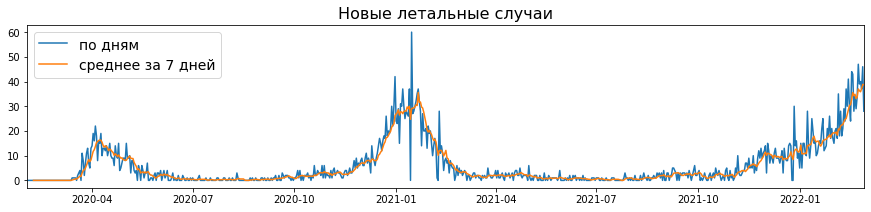

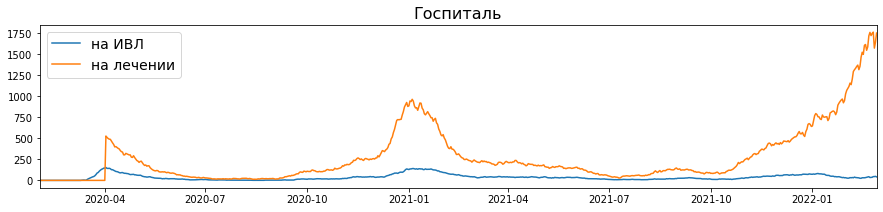

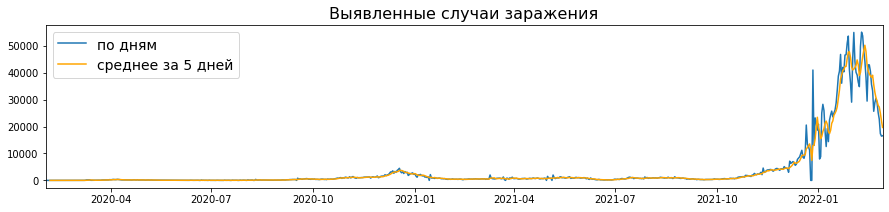

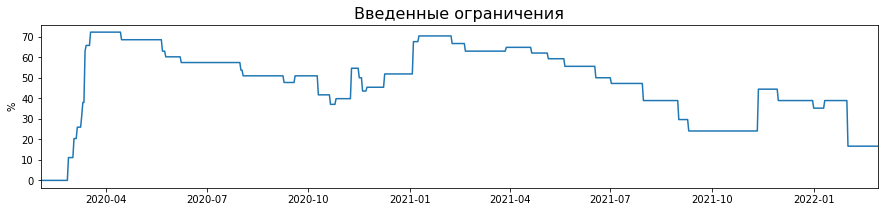

In [19]:
plt.figure(figsize = (15,3))
plt.plot(df1['летально'], label = 'по дням')
plt.plot(df1['летально'].rolling(window = 7).mean(), label = 'среднее за 7 дней')
plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.xlabel('')
plt.title('Новые летальные случаи', fontsize = 16)
plt.autoscale(axis='x',tight=True)
plt.show();
plt.figure(figsize = (15,3))
plt.plot(df1['ивл'], label = 'на ИВЛ')
plt.plot(df1['госпиталь'], label = 'на лечении')
#plt.plot(df2.rolling(window = 5).mean(), label = 'Скользящее среднее за 5 дней', color = 'orange')
plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.title('Госпиталь', fontsize = 16)
plt.xlabel('')
plt.autoscale(axis='x',tight=True)
plt.show();
plt.figure(figsize = (15,3))
plt.plot(df1['заражение'], label = 'по дням')
plt.plot(df1['заражение'].rolling(window = 5).mean(), label = 'среднее за 5 дней', color = 'orange')
plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.title('Выявленные случаи заражения', fontsize = 16)
plt.xlabel('')
plt.autoscale(axis='x',tight=True)
plt.show();
plt.figure(figsize = (15,3))
plt.plot(df1['ограничение'])
#plt.plot(df2.rolling(window = 5).mean(), label = 'Скользящее среднее за 5 дней', color = 'orange')
plt.title('Введенные ограничения', fontsize = 16)
plt.xlabel('')
plt.ylabel('%')
plt.autoscale(axis='x',tight=True)
plt.show();

Так как в начале до 2020-04-02 отсутствовали некоторые данные, эта дата выбрана для начала анализа

In [20]:
df1 = df1['2020-04-02':]

Определение взаимосвязи признаков между собой. Рссчет коэффициента корреляции Пирсона.

In [21]:
df1.corr().style.background_gradient(cmap='coolwarm')

,заражение,госпиталь,ивл,летально,ограничение
заражение,1.000000,0.746778,0.097708,0.551626,-0.464578
госпиталь,0.746778,1.000000,0.572412,0.881802,-0.270849
ивл,0.097708,0.572412,1.000000,0.666011,0.337215
летально,0.551626,0.881802,0.666011,1.000000,-0.100989
ограничение,-0.464578,-0.270849,0.337215,-0.100989,1.000000


Построение графика взаимных распределений признаков и визуальная о ценка зависимости признаков.

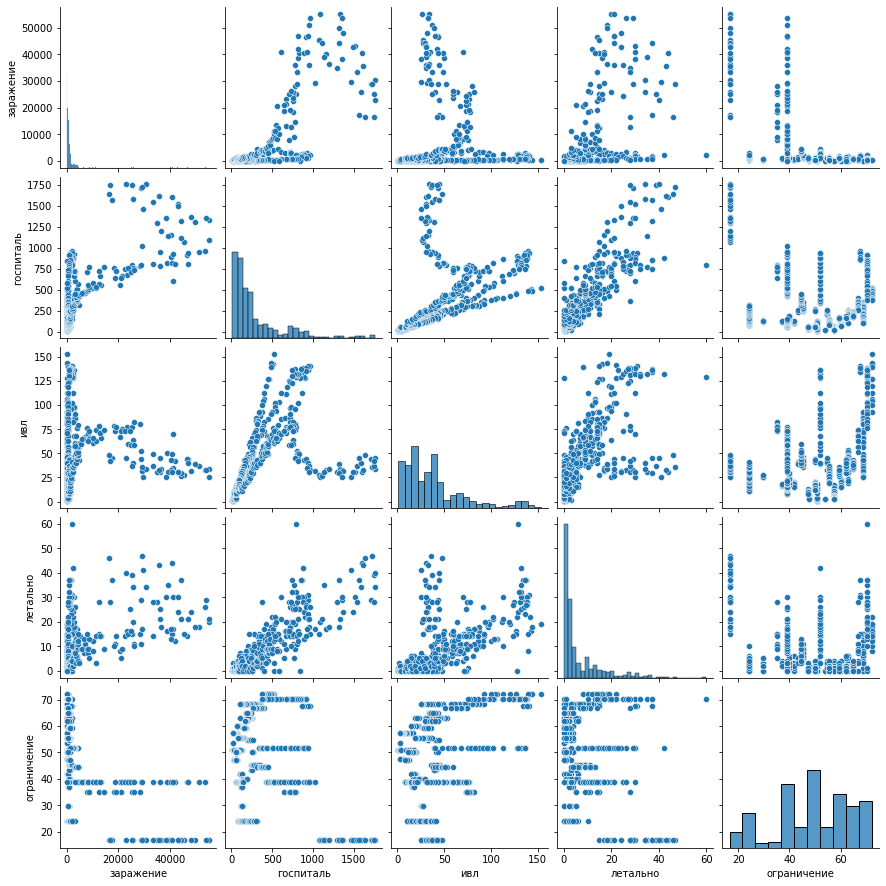

In [22]:
sns.pairplot(df1);

Значения количества заражений, госпитализированных пациентов и летальных исходов находятся во взаимной зависимости.  
Количество летальных исходов тем больше, чем больше пациентов госпитализировано и находится на ИВЛ.  
Эта взамосвязь объясняется тяжестью течения заболевания, пациенты с осложнениями поступают в госпитали, более тяжелые подключаются к аппаратам ИВЛ. Летальные исходы не связаны напрямую с подключенными пациентами к ИВЛ, так как причинами смерти обычно становятся осложнения других заболеваний. Нет возможности установить причинно-следственную связь, просто видно, что эти показатели ведут себя похоже с течением времени.  
Показатель степени введенных ограничений не проявил взаимосвязи с остальными данными, вероятно из-за отложенного во времени эффекта.
Поэтому будет проанализирован один временной ряд.

In [23]:
dfl = df1['летально']

Подбор сдвига временного ряда новых заражений в качестве экзогенной переменной для метода SARIMAX

In [24]:
pred_start = df1.index.min()
pred_end = df1.index.max()+ datetime.timedelta(days=14)
pred_range = pd.date_range(start=pred_start, end=pred_end, freq='D')
dfs = df1['заражение']
dfs = dfs.reindex(pred_range)
dfs = dfs.shift(16).fillna(0)
np.corrcoef(dfl,dfs[:-14])

array([[1.       , 0.6389902],
       [0.6389902, 1.       ]])

## Построение моделей, анализ результатов.

### Оценка параметров временного ряда

Проверка временного ряда на стационарность с использованием обобщенного теста Дики-Фуллера. Гипотеза H$_0$ - временной ряд не стационарен.

In [25]:
adf_test = adfuller(dfl)
res = '- отвергаем H0, процесс стационарный' if adf_test[1] < 0.05 else '- не отвергаем H0, процесс нестационарный'
print('p-value = ' + str(adf_test[1]), res)

p-value = 0.5355515294498137 - не отвергаем H0, процесс нестационарный


Взятие первой разности ряда и проверка её на стационарность

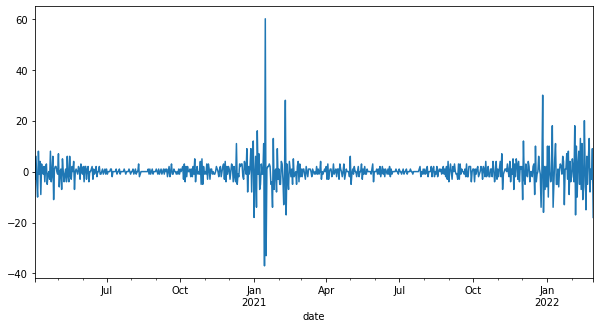

In [26]:
df_diff = dfl.diff(periods=1).dropna()
rcParams['figure.figsize'] = 10, 5
df_diff.plot();

In [27]:
adf_test = adfuller(df_diff)
res = '- отвергаем H0, процесс стационарный' if adf_test[1] < 0.05 else '- не отвергаем H0, процесс нестационарный'
print('p-value = ' + str(adf_test[1]), res)

p-value = 0.0012676125611448968 - отвергаем H0, процесс стационарный


Нестационарность не обнаружена, следовательно наш ряд - интегрированный ряд первого порядка. Коэффициент d = 1.  
Построение автокорреляционной функции ACF.

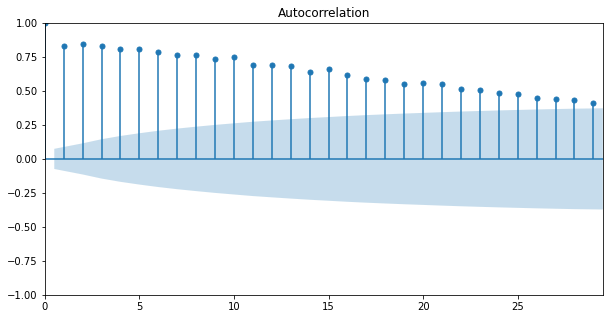

In [28]:
plot_acf(dfl)
plt.autoscale(axis='x',tight=True);

По коррелограмме определен номер лага с максимальной корреляцией. Он будет коэффициентом q в модели ARIMA. q=2.  
Построение частично атокорреляционной функции PACF

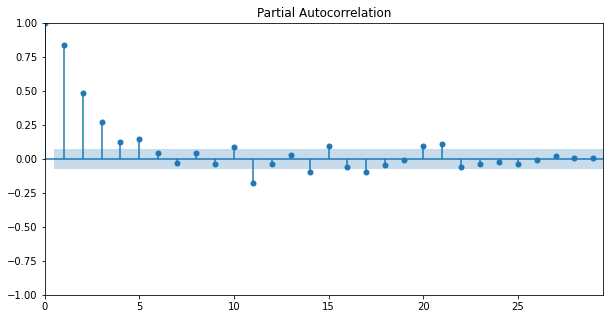

In [29]:
plot_pacf(dfl)
plt.autoscale(axis='x',tight=True);

По коррелограмме определен номер лага с максимальной корреляцией. Он будет коэффициентом p в модели ARIMA. p=1.  
Проведение декомпозиции временного ряда.

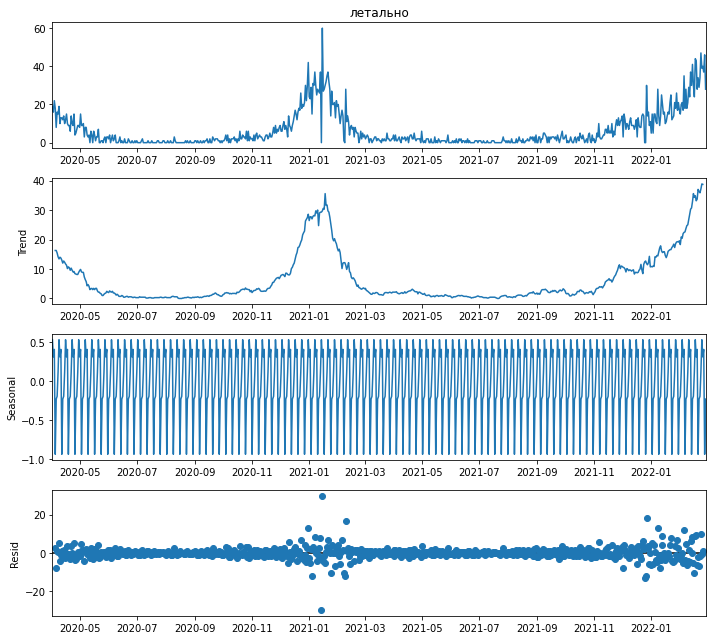

In [30]:
rcParams['figure.figsize'] = 10, 9
decompose = seasonal_decompose(dfl)
decompose.plot()
plt.show();

На основании графика определена сезонность - 7дней, тренд краткосрочный и меняет свое направление.  Остатки внешне похожи на белый шум с выбросами районе изменения тренда.  
Разделение датафрейма на тренировочный и тестовый набор. Для теста выбраны последние 14 дней.

In [31]:
train = dfl.iloc[:-14]
test = dfl.iloc[-14:]
train_ex = dfs[:-28]
test_ex = dfs[-28:-14]

### Модель SARIMA

Авторегрессионное интегрированное скользящее среднее или ARIMA - это метод прогнозирования для одномерных данных временных рядов.  
Он поддерживает элементы авторегрессии и скользящего среднего. Интегрированный элемент относится к разнице, позволяющей методу поддерживать данные временных рядов с помощью тренда.  
Сезонное авторегрессионное интегрированное скользящее среднее, SARIMA или Seasonal ARIMA, является расширением ARIMA, которое явно поддерживает одномерные данные временных рядов с сезонным компонентом.  
Он добавляет три новых гиперпараметра для указания авторегрессии (AR), разности (I) и скользящего среднего (MA) для сезонной составляющей ряда, а также дополнительный параметр для периода сезонности.  
Используем автоматическую подборку параметров модели ARIMA и SARIMA.

In [32]:
auto_arima(train, seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  684
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1850.876
Date:                Wed, 02 Mar 2022   AIC                           3711.753
Time:                        02:56:01   BIC                           3734.385
Sample:                             0   HQIC                          3720.511
                                - 684                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7998      0.027     29.911      0.000       0.747       0.852
ar.L2          0.1397      0.024      5.887      0.000       0.093       0.186
ma.L1         -1.7676      0.018    -98.033      0.000      -1.803      -1.732
ma.L2          0.8044      0.018     43.731      0.000       0.768       0.840
sigma2        13.1898      0.316     41.798      0.000      12.571      13.808
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10199.29
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.94   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
auto_arima(train, seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  684
Model:             SARIMAX(3, 1, 2)x(2, 0, [1], 7)   Log Likelihood               -1844.401
Date:                             Wed, 02 Mar 2022   AIC                           3706.803
Time:                                     02:58:23   BIC                           3747.541
Sample:                                          0   HQIC                          3722.568
                                             - 684                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8516      0.031     27.144      0.000       0.790       0.913
ar.L2          0.1530      0.030      5.090      0.000       0.094       0.212
ar.L3         -0.0556      0.028     -1.994      0.046      -0.110      -0.001
ma.L1         -1.8000      0.021    -85.179      0.000      -1.841      -1.759
ma.L2          0.8356      0.022     37.363      0.000       0.792       0.879
ar.S.L7       -0.7476      0.135     -5.549      0.000      -1.012      -0.484
ar.S.L14      -0.1139      0.028     -4.042      0.000      -0.169      -0.059
ma.S.L7        0.7387      0.131      5.641      0.000       0.482       0.995
sigma2        12.9791      0.321     40.493      0.000      12.351      13.607
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9814.00
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.85   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Обучение ARIMA (2, 1, 2) и SARIMA (3, 1, 2)x(2, 0, 1, 7)

In [34]:
model_arima = SARIMAX(train, order=(2, 1, 2), freq = 'D')
results_arima = model_arima.fit()
results_arima.summary()

/home/ruskafe/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               летально   No. Observations:                  684
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1850.876
Date:                Wed, 02 Mar 2022   AIC                           3711.753
Time:                        02:58:24   BIC                           3734.385
Sample:                    04-02-2020   HQIC                          3720.511
                         - 02-14-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7998      0.027     29.911      0.000       0.747       0.852
ar.L2          0.1397      0.024      5.887      0.000       0.093       0.186
ma.L1         -1.7676      0.018    -98.033      0.000      -1.803      -1.732
ma.L2          0.8044      0.018     43.731      0.000       0.768       0.840
sigma2        13.1898      0.316     41.798      0.000      12.571      13.808
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10199.29
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.94   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model_sarima = SARIMAX(train, order=(3, 1, 2), seasonal_order=(2, 0, 1, 7), freq = 'D')
results_sarima = model_sarima.fit()
results_sarima.summary()

/home/ruskafe/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/ruskafe/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            летально   No. Observations:                  684
Model:             SARIMAX(3, 1, 2)x(2, 0, [1], 7)   Log Likelihood               -1844.401
Date:                             Wed, 02 Mar 2022   AIC                           3706.803
Time:                                     02:58:28   BIC                           3747.541
Sample:                                 04-02-2020   HQIC                          3722.568
                                      - 02-14-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8516      0.031     27.144      0.000       0.790       0.913
ar.L2          0.1530      0.030      5.090      0.000       0.094       0.212
ar.L3         -0.0556      0.028     -1.994      0.046      -0.110      -0.001
ma.L1         -1.8000      0.021    -85.179      0.000      -1.841      -1.759
ma.L2          0.8356      0.022     37.363      0.000       0.792       0.879
ar.S.L7       -0.7476      0.135     -5.549      0.000      -1.012      -0.484
ar.S.L14      -0.1139      0.028     -4.042      0.000      -0.169      -0.059
ma.S.L7        0.7387      0.131      5.641      0.000       0.482       0.995
sigma2        12.9791      0.321     40.493      0.000      12.351      13.607
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9814.00
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.85   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
model_sarimax = SARIMAX(train, exog=train_ex,order=(3, 1, 2), seasonal_order=(2, 0, 1, 7), freq = 'D',enforce_invertibility=False)
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            летально   No. Observations:                  684
Model:             SARIMAX(3, 1, 2)x(2, 0, [1], 7)   Log Likelihood               -1854.848
Date:                             Wed, 02 Mar 2022   AIC                           3729.697
Time:                                     02:58:32   BIC                           3774.962
Sample:                                 04-02-2020   HQIC                          3747.214
                                      - 02-14-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
заражение      0.0003   5.08e-05      6.105      0.000       0.000       0.000
ar.L1         -0.4430      3.391     -0.131      0.896      -7.090       6.204
ar.L2         -0.0662      0.997     -0.066      0.947      -2.020       1.888
ar.L3          0.0071      0.115      0.062      0.950      -0.218       0.232
ma.L1         -0.5242      3.389     -0.155      0.877      -7.166       6.118
ma.L2         -0.1077      2.284     -0.047      0.962      -4.585       4.370
ar.S.L7       -0.1046      0.968     -0.108      0.914      -2.003       1.793
ar.S.L14      -0.0302      0.032     -0.957      0.339      -0.092       0.032
ma.S.L7        0.1316      0.968      0.136      0.892      -1.766       2.030
sigma2        13.4886      0.321     42.085      0.000      12.860      14.117
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              8712.66
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               3.62   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Прогноз на тестовой выборке

In [37]:
start=len(train)
end=len(train)+13
predict_arima = results_arima.predict(start=start, end=end, dynamic=False)
predict_sarima = results_sarima.predict(start=start, end=end, dynamic=False)
predict_sarimax = results_sarimax.predict(start=start, end=end, exog=test_ex)

Использовать модель SARIMAX с экзогенными признаками не представляется возможным, так как отсутствуют зависимые признаки в прогнозируемом (будущем) периоде.

### Экспоненциальное сглаживание

#### Базовое (простое) экспоненциальное сглаживание (линейное по Хольту)

In [38]:
model_1 = SimpleExpSmoothing(train, initialization_method="heuristic")\
    .fit(smoothing_level=0.2, optimized=False)
predict_1 = model_1.forecast(14)

/home/ruskafe/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


#### Двойное экспоненциальное сглаживание

In [39]:
model_2 = Holt(train, initialization_method="estimated")\
    .fit(smoothing_level=0.2, smoothing_trend=0.1, optimized=False)
predict_2 = model_2.forecast(14)

/home/ruskafe/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


#### Тройное экспоненциальное сглаживание (Холт Винтерс)

In [40]:
model_3 = ExponentialSmoothing(train,
                               freq = 'D',
                               seasonal_periods=7, 
                               trend='add', 
                               seasonal='add',
                               damped_trend=True,
                               initialization_method="estimated").fit()
predict_3 = model_3.forecast(14)

### Prophet

Prophet — библиотека с открытым исходным кодом от компании Facebook. По словам разработчиков (команды Core Data Science team) она хорошо работает с временными рядами, которые имеют ярко выраженные сезонные эффекты, а также имеют несколько таких периодов. Prophet устойчив к отсутствию данных и достаточно хорошо справляется с выбросами.

In [41]:
from prophet import Prophet

df2 = pd.DataFrame(dfl)
df2['ds'] = df2.index
df2.rename(columns={'летально':'y'}, inplace=True)

train_2 = df2[:-14]
test_2 = df2[-14:]
m = Prophet(weekly_seasonality=True)
m.fit(train_2)

future = m.make_future_dataframe(periods=14, freq='D')
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Графическое сравнение прогнозов

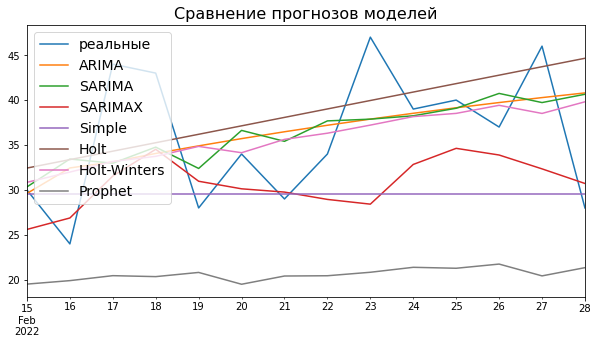

In [42]:
forecast.set_index('ds', inplace=True)
plt.figure(figsize = (10,5))
test.plot(label='реальные')
plt.plot(predict_arima, label = 'ARIMA')
plt.plot(predict_sarima, label = 'SARIMA')
plt.plot(predict_sarimax, label = 'SARIMAX')
predict_1.plot(label='Simple')
predict_2.plot(label='Holt')
predict_3.plot(label='Holt-Winters')
forecast['yhat'][-14:].plot(label='Prophet')
plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.xlabel('')
plt.title('Сравнение прогнозов моделей', fontsize = 16)
plt.autoscale(axis='x',tight=True)
plt.show();

###  Ошибки прогнозирования

In [43]:
mape_arima = mean_absolute_percentage_error(test, predict_arima)
mse_arima = mean_squared_error(test, predict_arima)
rmse_arima = rmse(test, predict_arima)
mape_sarima = mean_absolute_percentage_error(test, predict_sarima)
mse_sarima = mean_squared_error(test, predict_sarima)
rmse_sarima = rmse(test, predict_sarima)
mape_sarimax = mean_absolute_percentage_error(test, predict_sarimax)
mse_sarimax = mean_squared_error(test, predict_sarimax)
rmse_sarimax = rmse(test, predict_sarimax)
mape_1 = mean_absolute_percentage_error(test, predict_1)
mse_1 = mean_squared_error(test, predict_1)
rmse_1 = rmse(test, predict_1)
mape_2 = mean_absolute_percentage_error(test, predict_2)
mse_2 = mean_squared_error(test, predict_2)
rmse_2 = rmse(test, predict_2)
mape_3 = mean_absolute_percentage_error(test, predict_3)
mse_3 = mean_squared_error(test, predict_3)
rmse_3 = rmse(test, predict_3)
mape_p = mean_absolute_percentage_error(test_2.y, forecast.yhat.iloc[-14:])
mse_p = mean_squared_error(test_2.y, forecast.yhat.iloc[-14:])
rmse_p = rmse(test_2.y, forecast.yhat.iloc[-14:])
print(f'MAPE:')
print(f'    ARIMA:                {mape_arima:11.10}')
print(f'    SARIMA:               {mape_sarima:11.10}')
print(f'    SARIMAX:              {mape_sarimax:11.10}')
print(f'    Simple:               {mape_1:11.10}')
print(f'    Holt:                 {mape_2:11.10}')
print(f'    Holt-Winters:         {mape_3:11.10}')
print(f'    Prophet:              {mape_p:11.10}')
print(f'MSE:')
print(f'    ARIMA:                {mse_arima:11.10}')
print(f'    SARIMA:               {mse_sarima:11.10}')
print(f'    SARIMAX:              {mse_sarimax:11.10}')
print(f'    Simple:              {mse_1:11.10}')
print(f'    Holt:                {mse_2:11.10}')
print(f'    Holt-Winters:         {mse_3:11.10}')
print(f'    Prophet:             {mse_p:11.10}')
print(f'RMSE:')
print(f'    ARIMA:                {rmse_arima:11.10}')
print(f'    SARIMA:               {rmse_sarima:11.10}')
print(f'    SARIMAX:              {rmse_sarimax:11.10}')
print(f'    Simple:               {rmse_1:11.10}')
print(f'    Holt:                 {rmse_2:11.10}')
print(f'    Holt-Winters:         {rmse_3:11.10}')
print(f'    Prophet:             {rmse_p:11.10}')

MAPE:
    ARIMA:                0.1679563188
    SARIMA:               0.1668356272
    SARIMAX:              0.1647742521
    Simple:               0.1934703098
    Holt:                 0.1972813028
    Holt-Winters:         0.1632096332
    Prophet:              0.4026592939
MSE:
    ARIMA:                48.17694707
    SARIMA:               46.95986412
    SARIMAX:              65.69079358
    Simple:               91.9974854
    Holt:                 57.4596662
    Holt-Winters:         47.41971169
    Prophet:             284.6155929
RMSE:
    ARIMA:                6.940961538
    SARIMA:               6.852726765
    SARIMAX:              8.104985724
    Simple:               9.591531963
    Holt:                 7.580215446
    Holt-Winters:         6.886197187
    Prophet:             16.87055402


Методы SARIMA и Хольта-Винтерса показали лучшие из всех результаты. SARIMAX показал хорошую оценку по MAPE. 
Эти методы будут использованы для построения прогноза летальных исходов на 14 дней.

### Прогноз летальных исходов на 14 дней

#### Переобучение моделей на полных данных

In [44]:
auto_arima(dfl, seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  698
Model:             SARIMAX(2, 1, 3)x(2, 0, [1], 7)   Log Likelihood               -1900.775
Date:                             Wed, 02 Mar 2022   AIC                           3819.549
Time:                                     03:00:42   BIC                           3860.470
Sample:                                          0   HQIC                          3835.371
                                             - 698                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0311      0.028     -1.110      0.267      -0.086       0.024
ar.L2          0.9029      0.029     31.311      0.000       0.846       0.959
ma.L1         -0.8838      0.035    -24.903      0.000      -0.953      -0.814
ma.L2         -0.8360      0.067    -12.515      0.000      -0.967      -0.705
ma.L3          0.7968      0.036     22.205      0.000       0.726       0.867
ar.S.L7       -0.5504      0.116     -4.755      0.000      -0.777      -0.324
ar.S.L14      -0.1748      0.026     -6.619      0.000      -0.227      -0.123
ma.S.L7        0.5634      0.114      4.930      0.000       0.339       0.787
sigma2        13.6391      0.330     41.349      0.000      12.993      14.286
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):              7682.58
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               4.38   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
model_sarima = SARIMAX(dfl, order=(2, 1, 3), seasonal_order=(2, 0, 1, 7), freq = 'D')
results_sarima = model_sarima.fit()
model_sarimax = SARIMAX(dfl, exog=dfs[:-14],order=(3, 1, 2), seasonal_order=(2, 0, 1, 7), freq = 'D',enforce_invertibility=False)
results_sarimax = model_sarimax.fit()

/home/ruskafe/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/ruskafe/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
model_3 = ExponentialSmoothing(dfl,
                               freq = 'D',
                               seasonal_periods=7, 
                               trend='add', 
                               seasonal='add',
                               damped_trend=True,
                               initialization_method="estimated").fit()

#### Предсказание будущего периода

In [47]:
start=len(dfl)
end=len(dfl)+13
predict_3 = model_3.forecast(14)
predict_sarima = results_sarima.predict(start=start, end=end, dynamic=False)
predict_sarimax = results_sarimax.predict(start=start, end=end, exog=dfs[-14:])

#### Построение графика

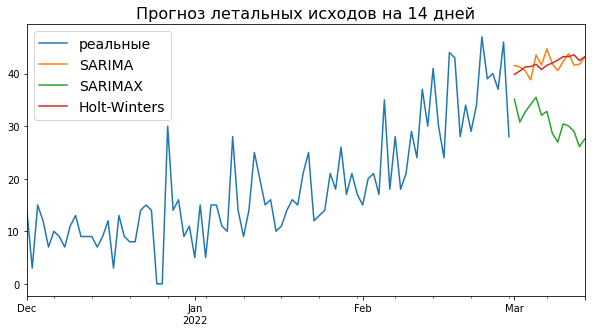

In [48]:
plt.figure(figsize = (10,5))
dfl[-90:].plot(label='реальные')
plt.plot(predict_sarima, label = 'SARIMA')
plt.plot(predict_sarimax, label = 'SARIMAX')
predict_3.plot(label='Holt-Winters')
plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.xlabel('')
plt.title('Прогноз летальных исходов на 14 дней', fontsize = 16)
plt.autoscale(axis='x',tight=True)
plt.show();

## Выводы

Изучены данные, собранные группой 'Our World in Data'.  
Была поставлена задача определить тяжесть течения пандемии от короновирусной инфекции в Германии и спрогнозировать количесто летальных исходов в ближайшие две недели.  
Данные, собранные группой, содержат 67 показателей, из которых были выбраны 6 и рассмотрены более подробно.
Проведены работы по очистке данных и разведочный анализ.
Обнаружены взаимосвязи между выбранными параметрами, произведена оценка их силы.
Для прогнозирования выбраны несколько моделей: ARIMA, SARIMA, SARIMAX, модели экспоненциального сглаживания разных степеней, Prophet. Модели построены и оценены их ошибки прогнозирования.  
На основе полученных метрик выбраны три модели с наилучшими результатами. Это оказались модели SARIMA, SARIMAX и Хольта-Винтерса.
Построен прогноз на 14 дней. Визуально два построенных предсказания продолжают существующий тренд. Предсказание модели SARIMAX изменило тренд. Возможно график находится уже на плато, так как ежедневный прирост новых заболеваний уже идет на спад. Вероятно текущий уровень летальных исходов уже находится в точке изменения тренда, но модели SARIMA и Хольта-Винтерса не могут предсказать его изменение, в отличие от модели SARIMAX, имеющей дополнительный признак для анализа. 